## Playing with parameters

In [6]:
from __future__ import print_function
from bbLib import generate_image as gi
import imageio             ###          FOR gif generation only
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [13]:
@interact(theta_E = (0.00, 2., 0.1),sigma_bkg = (0.,0.9,0.1), kernel_size = (0.,100.,1.),
          e1_lens = (-1.,1.,0.01), e2_lens = (-1.,1.,0.01),
          center_x_lens_light= (-2.,2.,0.1), center_y_lens_light= (-2.,2.,0.1), fwhm=(0.000001,1.,0.05),exp_time=(0.0,2000.0,100.),
          gamma_lens = (0.000001,4.,0.05), gamma_ext=(0.0,0.5,0.01),
          supersampling_factor=(1,10,1), z_source=(0.7,3.,0.05), z_lens=(0.7,3.,0.05))
def a(theta_E,sigma_bkg,center_x_lens_light,center_y_lens_light,fwhm,exp_time,gamma_lens,gamma_ext,e2_lens,e1_lens,supersampling_factor,z_source,z_lens):
    
    gi.generate_image(theta_E=theta_E, sigma_bkg = sigma_bkg, 
                      center_x_lens_light =center_x_lens_light, 
                      center_y_lens_light =center_y_lens_light, 
                      e2_lens=e2_lens,e1_lens=e1_lens,
                      fwhm= fwhm , exp_time=exp_time,
                      gamma_lens=gamma_lens, 
                      gamma_ext= gamma_ext, 
                      supersampling_factor=supersampling_factor,
                      z_source = z_source,z_lens = z_lens)
    return 0

interactive(children=(FloatSlider(value=1.0, description='theta_E', max=2.0), FloatSlider(value=0.4, descripti…

## Make gif

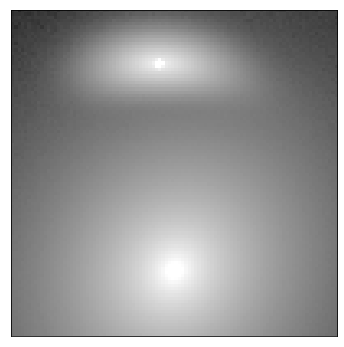

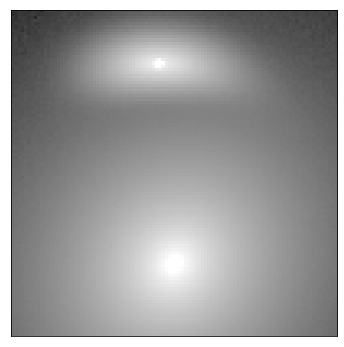

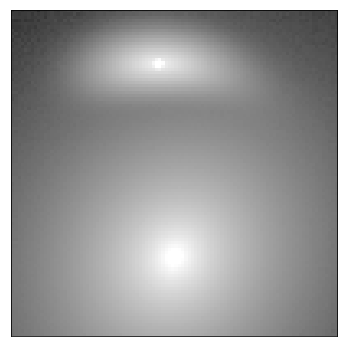

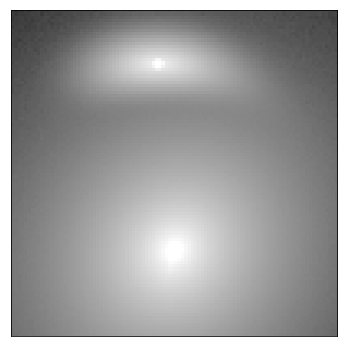

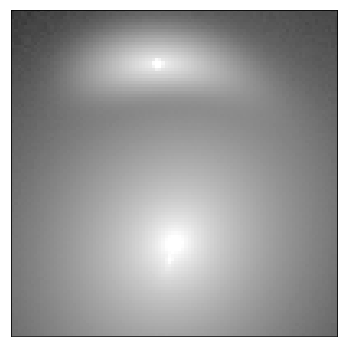

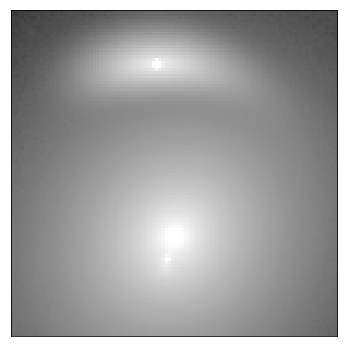

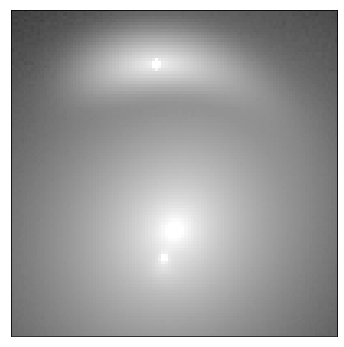

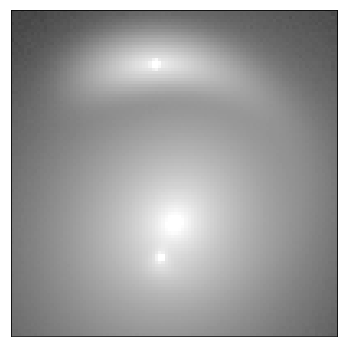

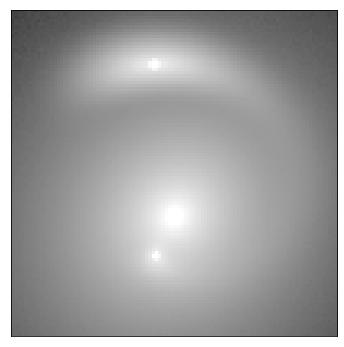

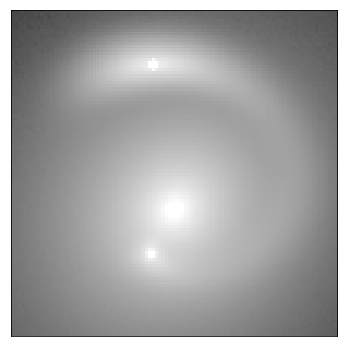

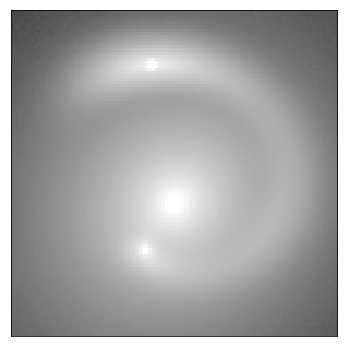

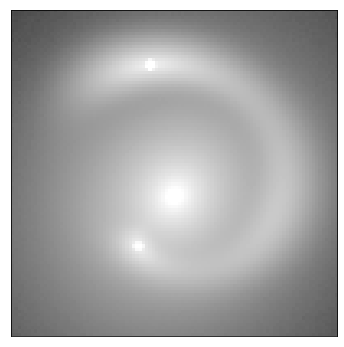

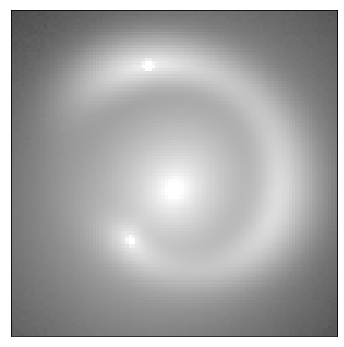

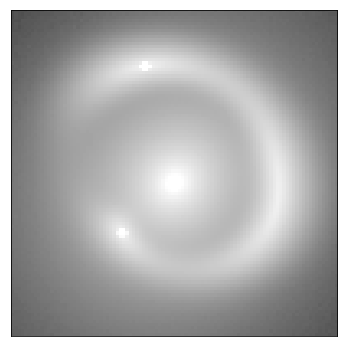

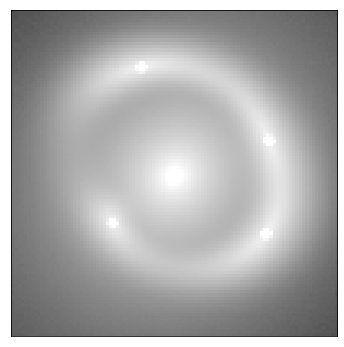

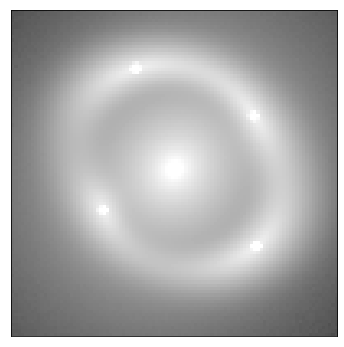

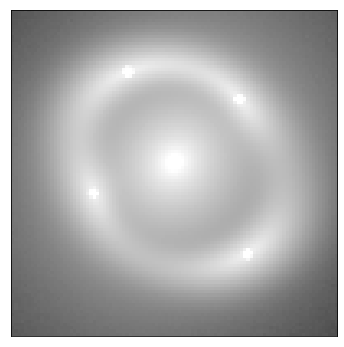

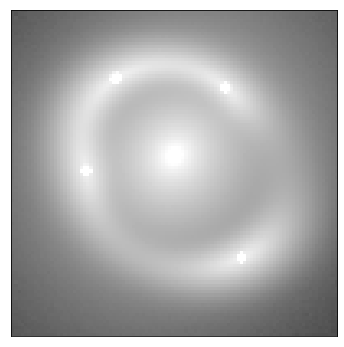

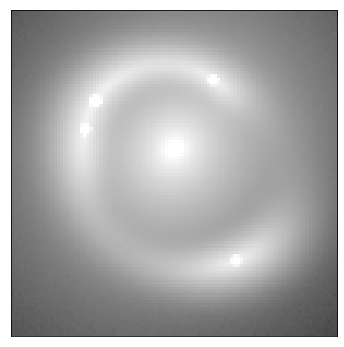

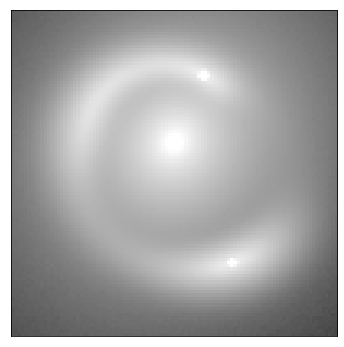

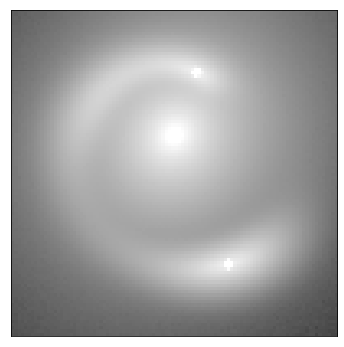

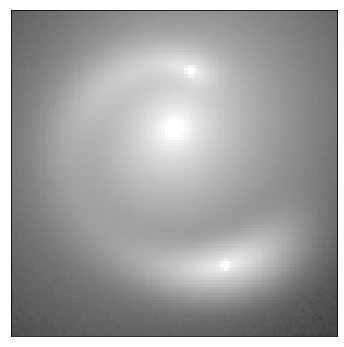

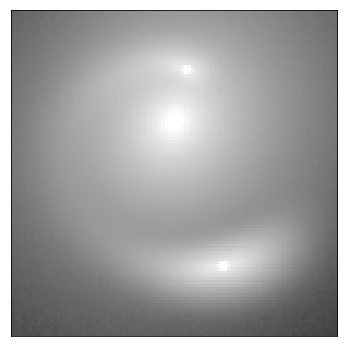

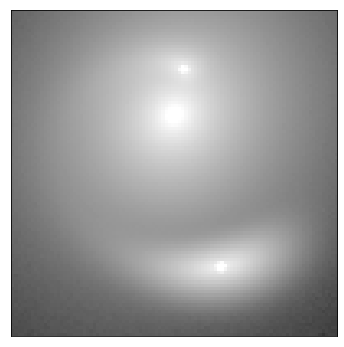

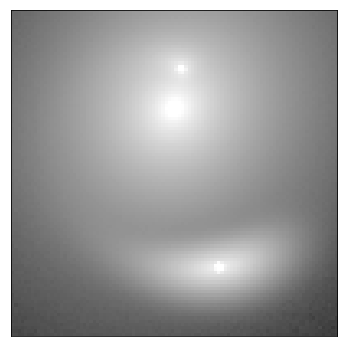

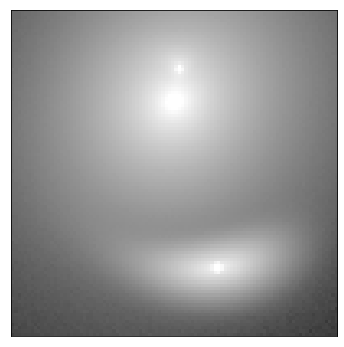

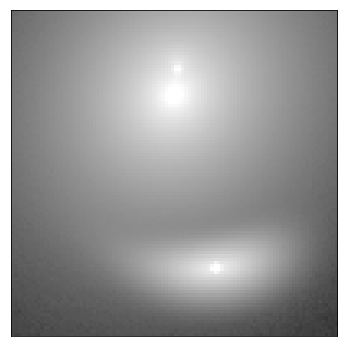

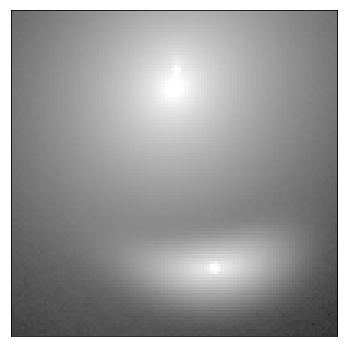

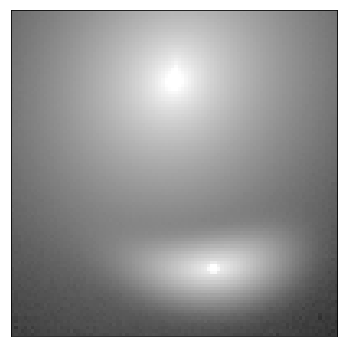

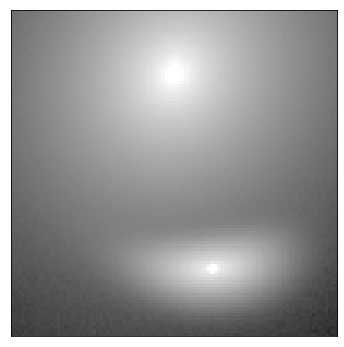

In [15]:
im_arr=[]
for i in np.linspace(-1.5,1.5,30):
    #     print('a')
    im_arr.append(gi.generate_image(theta_E=1.5, sigma_bkg = 0.000001, center_x_lens_light =0., center_y_lens_light =i, fwhm= 0.05,exp_time=10000.))

In [19]:
#reverse frames
a=len(im_arr)
im_arr2=im_arr[::-1]


In [20]:
for i in range(a):
    im_arr.append(im_arr2[i])

In [21]:
def plot_for_offset(i):
    fig=im_arr[i]
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    return image

kwargs_write = {'fps':1.0, 'quantizer':'nq'}
imageio.mimsave('./lens.gif', [plot_for_offset(i) for i in range(len(im_arr))], fps=20)